# Homework 1

Name: Owyong Zi Xin <br>

## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from numpy.polynomial.polynomial import polyfit
from IPython.core.display import display, HTML

### Importing the dataset

In [2]:
os.chdir(os.environ['USERPROFILE'] + '\Desktop' + r"\Y3S2\DBA4811 Analytical Tools for Consulting\HW 1")

#specify data file:
d = pd.read_csv(r"insurance.csv", index_col=0) #use 1st column as row labels or time stamps

## Aspects of the data that needs special attention

Before we begin creating a multiple regression model, we will pre-process our data.

### Checking for missing values in the insurance file

In [3]:
# Checking for null values
print('Number of missing values for each variable:')
d.isnull().sum()

Number of missing values for each variable:


charges     0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

There are no missing values. Therefore, there is no need to remove any rows or to replace missing values.

### Checking for outliers in the insurance file

Next, we have to check for outliers as those with high leverage or large residual can impact the slope and R^2 value of our multiple regression model.

#### Age Distribution

<AxesSubplot:xlabel='age'>

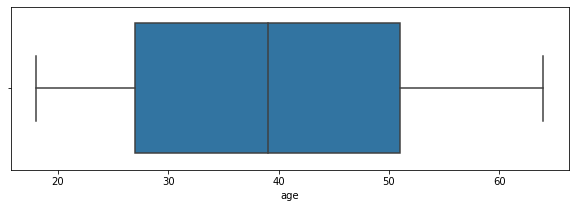

In [4]:
plt.figure(figsize=(10,3))
sns.boxplot(x=d['age'])

Age is a factor affecting insurance premiums since people at different ages possesses different risks of needing medical services.

#### Number of Children Distribution

<AxesSubplot:xlabel='children', ylabel='charges'>

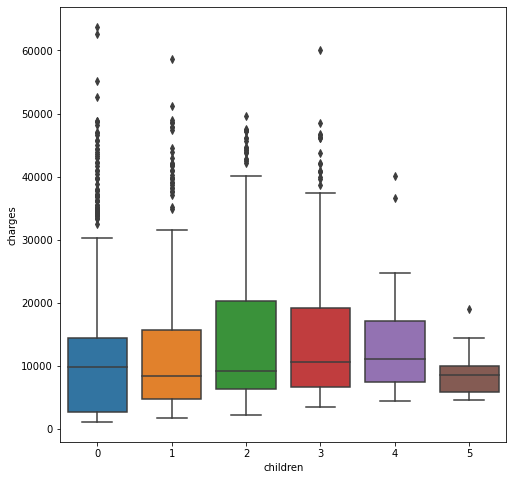

In [5]:
plt.figure(figsize=(8,8))
sns.boxplot(y=d['charges'], x=d['children'])

Number of children is a factor affecting insurance premiums since certain insurance offers child riders onto a parent's insurance policy. Riders would come at an extra cost on top of the premiums

#### BMI Distribution

<AxesSubplot:xlabel='bmi'>

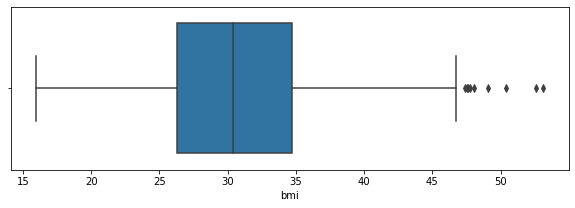

In [6]:
plt.figure(figsize=(10,3))
sns.boxplot(x=d['bmi'])

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

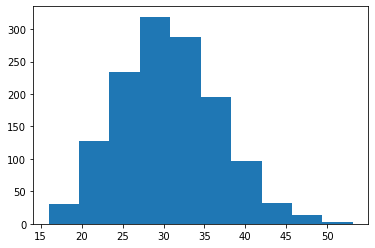

In [7]:
plt.hist(x=d['bmi'])

A BMI below 18.5 is classified as under weight and a BMI above 40 is classfied as extremely obese. There is a wide range of BMI from 15.96 to 53.13, which seems acceptable since in the USA, 18% of them are extremely obese. Therefore, it does not seem like there are any outliers in general. However, it is possible that those at the top of the BMI range could present itself as an outlier with a large residual. 

BMI is a factor affecting insurance premiums since people with BMI outside the healthy range are more likely to be met with certain diseases and hence require more medical services.

#### Gender Distribution

<AxesSubplot:xlabel='sex', ylabel='charges'>

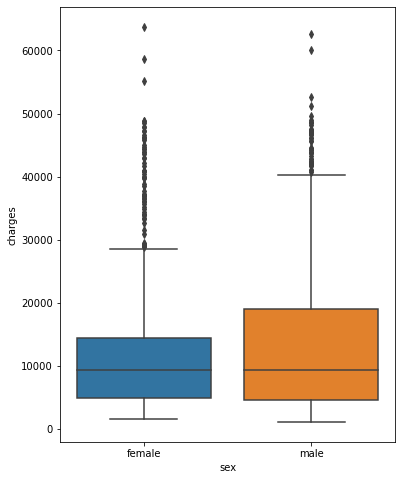

In [8]:
plt.figure(figsize=(6,8))
sns.boxplot(y=d['charges'], x=d['sex'])

Gender is a factor affecting insurance premiums since men and women have different life expectancy, as well as the different genders being more prone to certain illnesses. 

#### Smoker Status Distribution

<AxesSubplot:xlabel='smoker', ylabel='charges'>

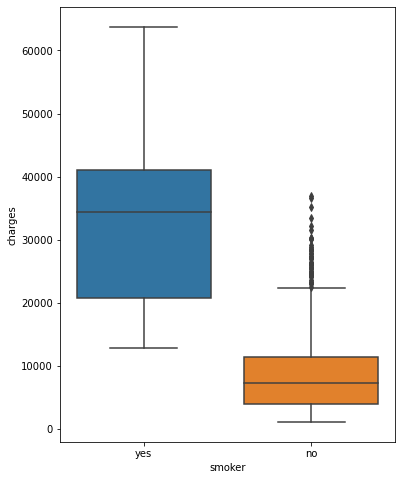

In [9]:
plt.figure(figsize=(6,8))
sns.boxplot(y=d['charges'], x=d['smoker'])

Here we can see the smoker status made quite a huge difference for charges, with smokers being charged more. <br>

Smoking status is a factor affecting insurance premiums since smokers tend to have a higher probability of facing heart and lung issues.

#### Region Distribution

<AxesSubplot:xlabel='region', ylabel='charges'>

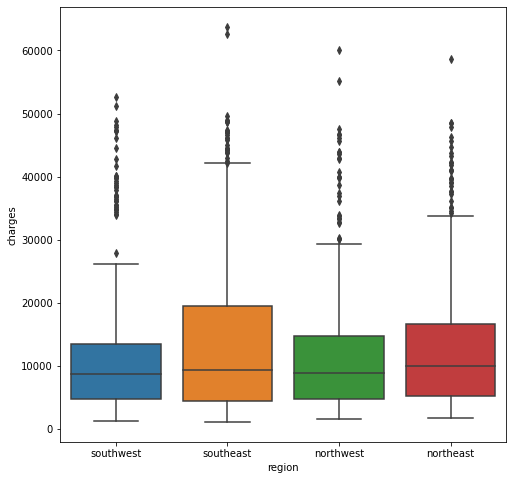

In [10]:
plt.figure(figsize=(8,8))
sns.boxplot(y=d['charges'], x=d['region'])

Region is a factor affecting insurance premiums since different parts of a country has different levels and standards of healthcare available. In the US, there are cities and suburbs with different medical facilities.

## Taking a look at the data

In [11]:
d.head()

,charges,age,sex,bmi,children,smoker,region
s_no,,,,,,,
1,16884.92400,19,female,27.900,0,yes,southwest
2,1725.55230,18,male,33.770,1,no,southeast
3,4449.46200,28,male,33.000,3,no,southeast
4,21984.47061,33,male,22.705,0,no,northwest
5,3866.85520,32,male,28.880,0,no,northwest


From here, we see that sex, smoker and region are categorical variables. 

## Encoding Categorical Variables

Using the insurance data set, we are going to encode the categorical variables.

In [12]:
# Multiple Regression
print('\nThe dataset has', len(d), 'rows and', d.shape[1], 'columns.') #len(d) == d.shape[0]

print('\nColumns are:', list(d))


#model equation:
eq = 'charges ~ age + sex + bmi + children + smoker + region'

#keep only relevant columns:
d = d[['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']]
print('First 10 rows:\n')
print(d.head(10))
print('\n' + eq)

#create categorical dummies:
#encode text variable 'sex'
print("\n\nUnique values in text variable 'sex':", sorted(set(d['sex'].dropna()))
      + ([np.nan] if d['sex'].isnull().sum() > 0 else []))

#turn text variable sex into categorical dummies
#use short prefix 'sex'; first category AVE's dummy will be dropped
d1 = pd.get_dummies(d['sex'], prefix='sex', drop_first=True)

print("\nCategorical dummies from text variable 'sex':\n")
print(d1.head(10))


#encode text variable 'smoker'
print("\n\nUnique values in text variable 'smoker':", sorted(set(d['smoker'].dropna()))
      + ([np.nan] if d['smoker'].isnull().sum() > 0 else []))

#turn text variable smoker into categorical dummies
#use short prefix 'sm'; first category AVE's dummy will be dropped
d2 = pd.get_dummies(d['smoker'], prefix='sm', drop_first=True)

print("\nCategorical dummies from text variable 'smoker':\n")
print(d2.head(10))


#encode text variable 'region'
print("\n\nUnique values in text variable 'region':", sorted(set(d['region'].dropna()))
      + ([np.nan] if d['region'].isnull().sum() > 0 else []))

#turn text variable region into categorical dummies
#use short prefix 'rg'; first category AVE's dummy will be dropped
d3 = pd.get_dummies(d['region'], prefix='rg', drop_first=True)

print("\nCategorical dummies from text variable 'region':\n")
print(d3.head(10))


#reconstitute dataframe d:

d = pd.concat([d.drop(['sex', 'smoker', 'region'], axis=1), d1, d2, d3], axis=1)
print('\n\nReconstituted dataset has', len(d), 'rows.\n')
print(d.head())

#saving the encoded data
d_ec = d

modeleq = ' + '.join(list(d)).replace('+', '~', 1)
#can also be written out in full:
#modeleq = 'charges ~ age + sex + bmi + children + smoker + region'

print('\nModel equation:', modeleq, '\n')


The dataset has 1338 rows and 7 columns.

Columns are: ['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']
First 10 rows:

          charges  age     sex     bmi  children smoker     region
s_no                                                              
1     16884.92400   19  female  27.900         0    yes  southwest
2      1725.55230   18    male  33.770         1     no  southeast
3      4449.46200   28    male  33.000         3     no  southeast
4     21984.47061   33    male  22.705         0     no  northwest
5      3866.85520   32    male  28.880         0     no  northwest
6      3756.62160   31  female  25.740         0     no  southeast
7      8240.58960   46  female  33.440         1     no  southeast
8      7281.50560   37  female  27.740         3     no  northwest
9      6406.41070   37    male  29.830         2     no  northeast
10    28923.13692   60  female  25.840         0     no  northwest

charges ~ age + sex + bmi + children + smoker + region


U

After encoding, we will create a regression model with all the variables to see the significance and each variable.

## Regression Model

In [13]:
#fit the regression model:
print(ols('charges ~ age + bmi + children + sex_male + sm_yes + rg_northwest + rg_southeast + rg_southwest', d_ec).fit().summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.749     
Dependent Variable:   charges            AIC:                  27113.5058
Date:                 2021-02-10 21:29   BIC:                  27160.2962
No. Observations:     1338               Log-Likelihood:       -13548.   
Df Model:             8                  F-statistic:          500.8     
Df Residuals:         1329               Prob (F-statistic):   0.00      
R-squared:            0.751              Scale:                3.6749e+07
-------------------------------------------------------------------------
                Coef.    Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------
Intercept    -11938.5386 987.8192 -12.0858 0.0000 -13876.3934 -10000.6837
age             256.8564  11.8988  21.5867 0.0000    233.5138    280.1989
bmi             339.1935  28.5995  11.8601 0.0000    283.08

From here, gender and region has a p-value of more than 0.05, where we do not reject the null hypothesis. This means that gender and region does not contribute significantly to charges. This does not agree with our research, hence we should look into whether there is any correlation or collinearity between the variables.

## Checking correlation between variables

#### Visualizing Correlations


Correlation heatmaps:


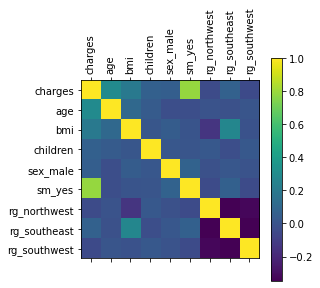

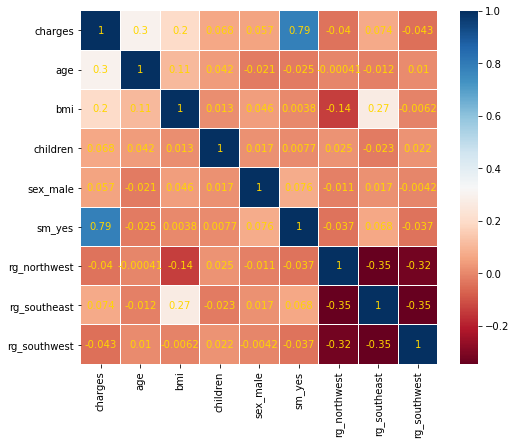

In [14]:
print('\nCorrelation heatmaps:')
plt.matshow(d_ec.corr()) # matrix of correlations
plt.xticks(range(len(d_ec.columns)), d_ec.columns, rotation=90) # rotate x labels so less likelihood of overlaps
plt.yticks(range(len(d_ec.columns)), d_ec.columns)

plt.colorbar() # lighter color represents higher correlations
plt.show()

plt.rcParams["figure.figsize"] = (8, 6.5)

fg = sns.heatmap(d_ec.corr(), annot=True, cmap='RdBu', linewidths=0.1, annot_kws={'size':10, 'color':'gold'},
               xticklabels=True, yticklabels=True)
fg = plt.gcf
#fg.set_size_inches(8, 8)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.show()

From here, we observe correlation between: <br>
- charges and smoker
- charges and age

### Looking more into charges

#### Charges Distribution

<AxesSubplot:xlabel='charges', ylabel='Count'>

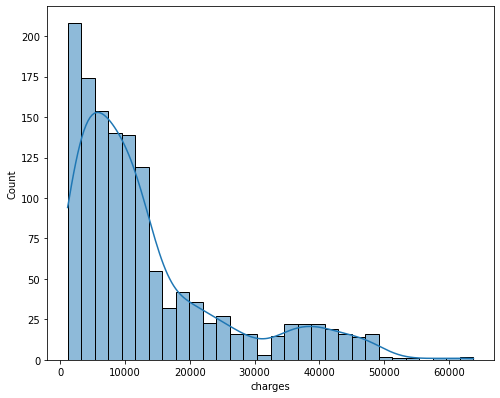

In [15]:
sns.histplot(d['charges'], kde=True)

Turns out, charges are not normally distributed and is right skewed. Hence, there is a need to make this closer to normal distribution.

In [16]:
#create a copy of the data 
d_ec2 = d_ec

# natural log of charges
d_ec2['charges'] = np.log(d_ec2['charges'])
d_ec2.head()

,charges,age,bmi,children,sex_male,sm_yes,rg_northwest,rg_southeast,rg_southwest
s_no,,,,,,,,,
1,9.734176,19,27.900,0,0,1,0,0,1
2,7.453302,18,33.770,1,1,0,0,1,0
3,8.400538,28,33.000,3,1,0,0,1,0
4,9.998092,33,22.705,0,1,0,1,0,0
5,8.260197,32,28.880,0,1,0,1,0,0


#### New Charges Distribution

<AxesSubplot:xlabel='charges', ylabel='Count'>

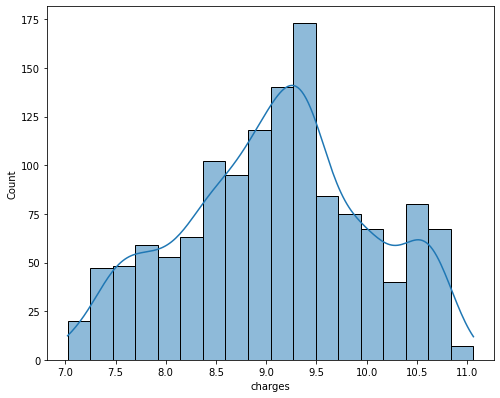

In [17]:
sns.histplot(d_ec2['charges'], kde=True)

Now, charges are more normally distributed after applying natural log to it. We shall use charges with natural log.

### Testing the new model

In [18]:
print(ols('charges ~ age + bmi + children + sex_male + sm_yes + rg_northwest + rg_southeast + rg_southwest', d_ec2).fit().summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: charges          AIC:                1635.0334
Date:               2021-02-10 21:29 BIC:                1681.8238
No. Observations:   1338             Log-Likelihood:     -808.52  
Df Model:           8                F-statistic:        549.8    
Df Residuals:       1329             Prob (F-statistic): 0.00     
R-squared:          0.768            Scale:              0.19739  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       7.0306    0.0724  97.1125  0.0000   6.8885   7.1726
age             0.0346    0.0009  39.6555  0.0000   0.0329   0.0363
bmi             0.0134    0.0021   6.3811  0.0000   0.0093   0.0175
children        0.1019    0.0101  10.0853  0.0000   0.0820   0.1217
sex_ma

By making charges more normally distributed, the p-value of gender and region fell, hence making them significant variables in predicting charges. Also, the adjusted R^2 increased.

## Interaction Terms (Collinearity)

Here, we should test for collinearity between variables, to see if we can further improve the accuracy of the model. Furthermore, the clear contrast in charges for the different genders highlighted such a need to test for collinearity.

#### Testing for interaction between smoking status and gender

In [19]:
print(ols('charges ~ age + bmi + children + sex_male*sm_yes + rg_northwest + rg_southeast + rg_southwest', d_ec2).fit().summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.768    
Dependent Variable: charges          AIC:                1629.6659
Date:               2021-02-10 21:29 BIC:                1681.6553
No. Observations:   1338             Log-Likelihood:     -804.83  
Df Model:           9                F-statistic:        491.8    
Df Residuals:       1328             Prob (F-statistic): 0.00     
R-squared:          0.769            Scale:              0.19645  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept           7.0558   0.0728 96.8896 0.0000  6.9129  7.1987
age                 0.0346   0.0009 39.7513 0.0000  0.0329  0.0363
bmi                 0.0131   0.0021  6.2552 0.0000  0.0090  0.0172
children            0.1011   0.0101 10.0281 0.0000  0.0813  0.1209
sex_male     

The interaction between gender and smoker has a p-value of less than 0.05, where we reject the null hypothesis. Therefore, the interaction between gender and smoker is a significant variable in predicting charges. <br>

Also, there was a small increase in adjusted R^2.

#### Testing for interaction between gender and BMI

In [20]:
print(ols('charges ~ age + children + bmi*sex_male + sm_yes + rg_northwest + rg_southeast + rg_southwest', d_ec2).fit().summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: charges          AIC:                1635.8646
Date:               2021-02-10 21:29 BIC:                1687.8539
No. Observations:   1338             Log-Likelihood:     -807.93  
Df Model:           9                F-statistic:        488.9    
Df Residuals:       1328             Prob (F-statistic): 0.00     
R-squared:          0.768            Scale:              0.19736  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       7.0983    0.0959  74.0065  0.0000   6.9102   7.2865
age             0.0346    0.0009  39.6360  0.0000   0.0329   0.0363
children        0.1020    0.0101  10.0967  0.0000   0.0822   0.1218
bmi             0.0112    0.0029   3.8474  0.0001   0.0055   0.0169
sex_ma

From here, we can see a large p-value for the interaction between gender and BMI. Therefore, we do not reject the null hypothesis and conclude that the interaction between gender and BMI is insignificant in predicting charges.

Overall, there is an interaction between gender and smoker status, which we should include in the model.

## Transforming Variables for a Better Fit

Re-expressing variables can make a relationship more linear if the transformations are appropriate. We shall transform variables and perform a regression run then remove those with a large p-value.

charges ~ age + bmi + children + sex_male + sm_yes + rg_northwest + rg_southeast + rg_southwest 

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: charges          AIC:                1635.0334
Date:               2021-02-10 21:29 BIC:                1681.8238
No. Observations:   1338             Log-Likelihood:     -808.52  
Df Model:           8                F-statistic:        549.8    
Df Residuals:       1329             Prob (F-statistic): 0.00     
R-squared:          0.768            Scale:              0.19739  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       7.0306    0.0724  97.1125  0.0000   6.8885   7.1726
age             0.0346    0.0009  39.6555  0.0000   0.0329   0.0363
bmi             0.0134    0.0021   6.3811  0

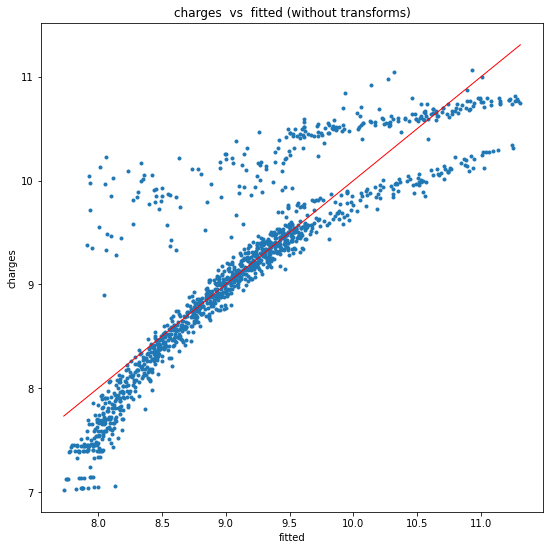

charges ~ age + bmi + children + sex_male + sm_yes + rg_northwest + rg_southeast + rg_southwest + age_sqar + age_sqrt + bmi_sqar + bmi_sqrt + children_sqar + children_sqrt + sex_male_sqar + sex_male_sqrt + sm_yes_sqar + sm_yes_sqrt + rg_northwest_sqar + rg_northwest_sqrt + rg_southeast_sqar + rg_southeast_sqrt + rg_southwest_sqar + rg_southwest_sqrt 

                      Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.769    
Dependent Variable:     charges             AIC:                   1624.7025
Date:                   2021-02-10 21:29    BIC:                   1702.6865
No. Observations:       1338                Log-Likelihood:        -797.35  
Df Model:               14                  F-statistic:           319.6    
Df Residuals:           1323                Prob (F-statistic):    0.00     
R-squared:              0.772               Scale:                 0.19500  
-----------------------------------------------------

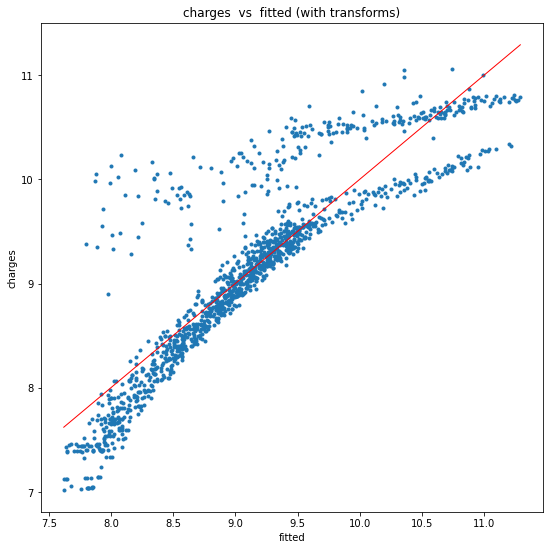

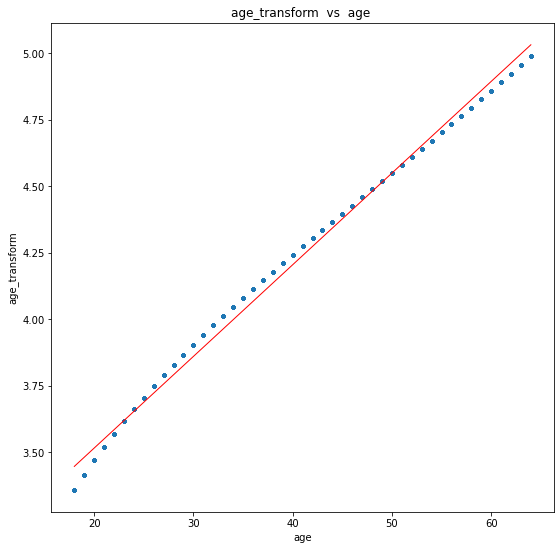

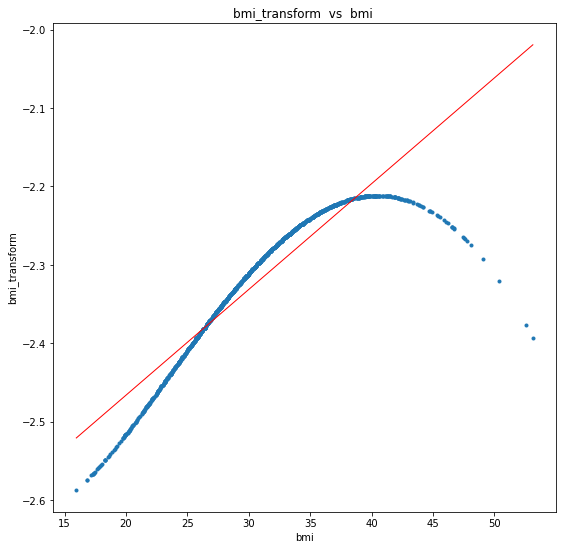

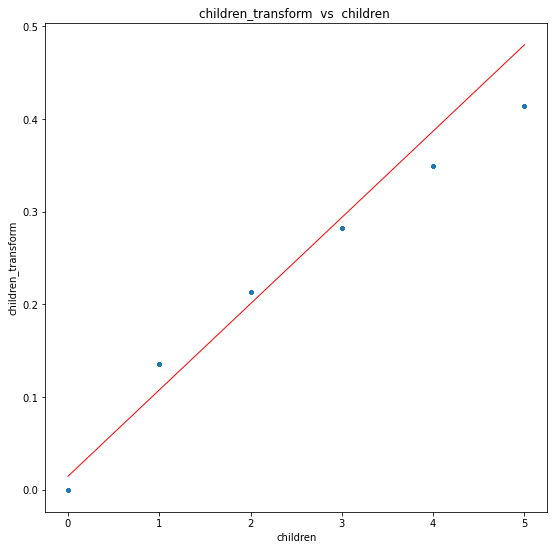

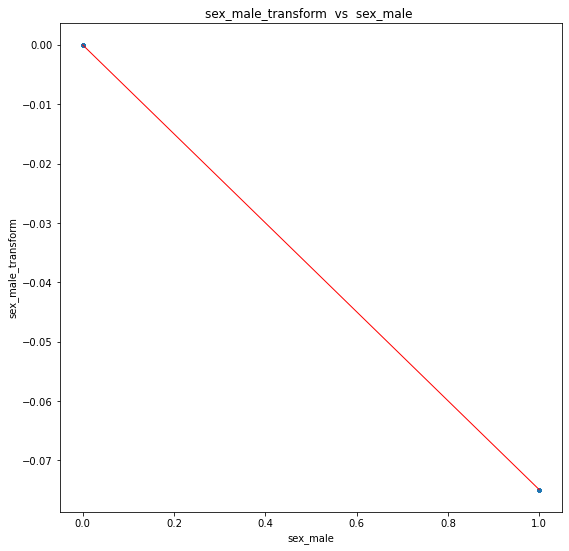

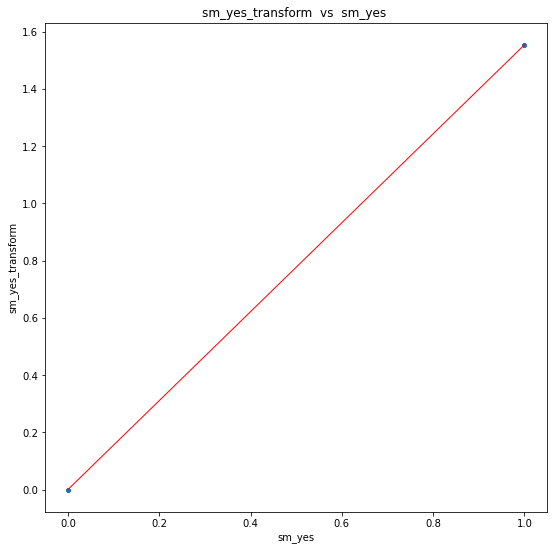

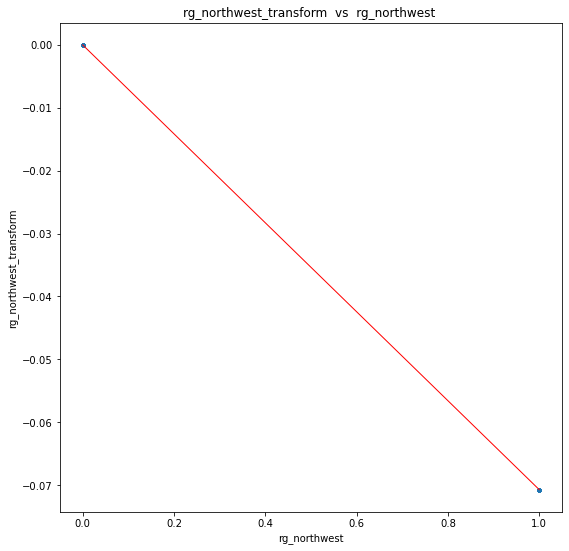

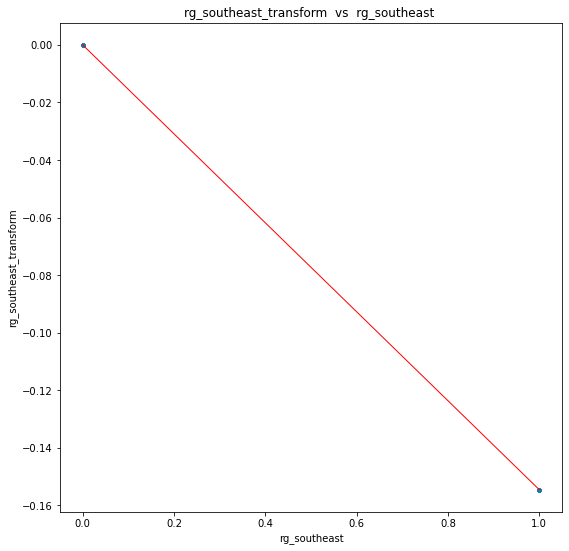

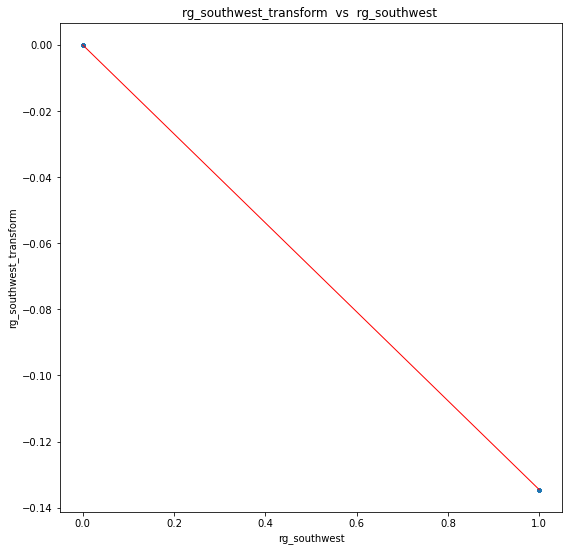

In [21]:
#Regression with Transformed Variables

#square and square-root when variable non-negative
#cube and cube-root for variable with any negative value

display(HTML("<style>div.output_scroll { height: 39em; }</style>")) # 45em for class

df = d_ec2

#use only a subset of Xs:
df = df[['charges', 'age', 'bmi', 'children', 'sex_male', 'sm_yes', 'rg_northwest', 'rg_southeast', 'rg_southwest']]
n = list(df)

modeleq = ' + '.join(list(df)).replace('+', '~', 1)
print(modeleq, '\n')


regout = ols(modeleq, df).fit()
print(regout.summary2())

yhat = regout.fittedvalues.rename('fitted') #else the Series has no name
#print('\nFitted Values:\n')
#print(yhat)

yn = 'charges'
y = df[yn]
n.remove(yn)

%matplotlib inline


def YvsX(x, y, t=''):
    #plot y vs x
    
    plt.figure(figsize=(9, 9)) #alternatively, set universally: pl.rcParams["figure.figsize"] = (9, 9)

    plt.plot(x, y, 'o', markersize=3) #plot points, without joining with lines

    a, b = min(x), max(x)
    s, i = np.polyfit(x, y, 1) #s=slope, i=intercept; for best-fit 1-degree polynomial
    
    plt.plot([a, b], i + [s * a, s * b], 'r', linewidth=1) #plot 2 points & join with red line; this fake line is not part of regression

    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(y.name + '  vs  ' + x.name + ' ' + t)

    plt.show()

#plot y vs fit:
YvsX(yhat, y, '(without transforms)')


#add squares and sqrt of Xs:

for i in list(df)[1:]:
    if sum(df[i] < 0) == 0:
        df[i + '_sqar'] = df[i] ** 2
        df[i + '_sqrt'] = np.sqrt(df[i])
    else:
        df[i + '_cube'] = df[i] ** 3
        df[i + '_cbrt'] = np.cbrt(df[i])

d_ec4 = df
        
#verify square & square-root:
#print(df[['rm', 'rm_sqar', 'rm_sqrt']], '\n')
    
modeleq = ' + '.join(list(df)).replace('+', '~', 1)
print(modeleq, '\n')


regout = ols(modeleq, df).fit()
print(regout.summary2())

yhat = regout.fittedvalues.rename('fitted') #else the Series has no name
#print('\nFitted Values:\n')
#print(yhat)

#plot y vs fit:
YvsX(yhat, y, '(with transforms)')

def curve(x):
    #collect all x terms (original & transformed);
    #    display x's nonlinear relationship with y as determined within the regression
    
    xcurve = 0
    #regout.params.loc[x] is x coefficient
    for i in ['', '_sqar', '_sqrt', '_cube', '_cbrt']:
        xcurve = xcurve + (regout.params.loc[x + i] * df[x + i] if x + i in regout.params.index else 0)
    xcurve.name = x + '_transform'

    YvsX(df[x], xcurve)

#display each predictor's nonlinear relationship with Y:
for i in n:
    curve(i)

#ptratio: essentially linearly related to y, within this regression
#nox: can square and square-root really produce this combined transformation???

In [22]:
d_ec4.head()

,charges,age,bmi,children,sex_male,sm_yes,rg_northwest,rg_southeast,rg_southwest,age_sqar,...,sex_male_sqar,sex_male_sqrt,sm_yes_sqar,sm_yes_sqrt,rg_northwest_sqar,rg_northwest_sqrt,rg_southeast_sqar,rg_southeast_sqrt,rg_southwest_sqar,rg_southwest_sqrt
s_no,,,,,,,,,,,,,,,,,,,,,
1,9.734176,19,27.900,0,0,1,0,0,1,361,...,0,0.0,1,1.0,0,0.0,0,0.0,1,1.0
2,7.453302,18,33.770,1,1,0,0,1,0,324,...,1,1.0,0,0.0,0,0.0,1,1.0,0,0.0
3,8.400538,28,33.000,3,1,0,0,1,0,784,...,1,1.0,0,0.0,0,0.0,1,1.0,0,0.0
4,9.998092,33,22.705,0,1,0,1,0,0,1089,...,1,1.0,0,0.0,1,1.0,0,0.0,0,0.0
5,8.260197,32,28.880,0,1,0,1,0,0,1024,...,1,1.0,0,0.0,1,1.0,0,0.0,0,0.0


We can see that after transformation, the adjusted R^2 increased to 0.769. This means that the transformation resulted in a more fitting model.

## Final Variable Selection 

#### Regression Feature Selection

In [23]:
# Multiple Regression Feature Selection (much simpler than Variable_Selection.ipynb)

#use F-stat p-values; switch to Adjusted R2 when p-values are 0

def mr(selection=False):
    h = d_ec4
    #print(h.head(0)) # dataset's variable names
    print('\nThe dataset has', len(h), 'rows and', h.shape[1], 'columns.', '' if selection else '\n')

    #specify C() for Categorical, else could be interpreted as numeric:
    #hout=ols('resale_price ~ floor_area_sqm + C(flat_type)', h).fit()
    
    yvar = 'charges'
    
    #to inlcude all columns:
    #cn = list(h)
    #cn.insert(0, cn.pop(cn.index(yvar)))
    #h = h.loc[:, cn]
    #modeleq = ' + '.join(cn).replace('+', '~', 1)
    #print(modeleq)
    
    modeleq = yvar + ' ~'
    for xvar in (  # insert new 'x variable' into a row, ending with ','
            'age',
            'bmi',
            'children',
            'sex_male',
            'sm_yes',
            'rg_northwest', 
            'rg_southwest',
            'rg_southeast',
            'age_sqar',
            'age_sqrt',
            'bmi_sqar',
            'bmi_sqrt',
            'children_sqar',
            'children_sqrt',
            'sex_male_sqar',
            'sex_male_sqrt',
            'sm_yes_sqar',
            'sm_yes_sqrt',
            'rg_northwest_sqar',
            'rg_northwest_sqrt',
            'rg_southwest_sqar',
            'rg_southwest_sqrt',
            'rg_southwest_sqar',
            'rg_southwest_sqrt'
            ):
        if modeleq[-1] == '~':
            modeleq = modeleq + ' ' + xvar
        else:
            modeleq = modeleq + ' + ' + xvar

    bmodeleq = modeleq
    
    if selection:
        #eliminate X variables one by one:
        print('\nVariable Selection using t-stat p-value & PR(>F):')
        
        #initialize p-value & adjusted R2:
        #set to infinity (or import sys; sys.maxsize) (or max=1.7976931348623157e+308 min=2.2250738585072014e-308) :
        minfpv = np.inf #f-stat p-value
        maxadjR2 = -minfpv

        #machine learns:
        while True:
            hout = ols(modeleq, h).fit()
            #print(dir(hout)) # gives all the attributes of .fit(), e.g. .fvalue & .f_pvalue

            fpv = hout.f_pvalue
            #see if a better model (smaller F-stat p-value) is found:
            if fpv < minfpv:
                minfpv = fpv
                maxadjR2 = hout.rsquared_adj
                bmodeleq = modeleq
            elif fpv == 0.0:
                #resolve using adjusted R2:
                if hout.rsquared_adj >= maxadjR2:
                    minfpv = fpv
                    maxadjR2 = hout.rsquared_adj
                    bmodeleq = modeleq
                
            numx = modeleq.count(' + ')
            print('\nF-statistic =', hout.fvalue, '       PR(>F) =', fpv, 'for', numx + 1, 'Xs.')

            if modeleq.find(' + ') == -1:
                # 1 xvar left
                # adjusted-R2 for no xvar (fit is y-bar) is 0; consider if adjusted-R2 < 0 for 1 xvar
                break

            #identify X variable to delete by finding the one with largest t-stat p-value (equivalently, PR>F):
            prf = anova_lm(hout, typ=2).iloc[:-1, :].sort_values(['F']
                                ).sort_values(['df'], ascending=False)['PR(>F)']
            maxp = max(prf)
            #print('\n',dict(prf))
            xdrop = prf[maxp == prf].axes[0][0]  # 1st element of row-label .axes[0]

            # xdrop removed from model equation:
            if (modeleq.find('~ ' + xdrop + ' + ') != -1): #xdrop is 1st x
                modeleq = modeleq.replace('~ ' + xdrop + ' + ', '~ ')
            elif (modeleq.find('+ ' + xdrop + ' + ') != -1):
                modeleq = modeleq.replace('+ ' + xdrop + ' + ', '+ ')
            else: #xdrop is last x
                modeleq = modeleq.replace(' + ' + xdrop, '')
            #print('Model equation:',modeleq,'\n')

            #print(prf)
            print('Variable to drop:', xdrop, '       p-value =', prf[xdrop])

        #machine learnt
        
        print('Variable left:', prf.loc[~prf.index.isin([xdrop])].axes[0][0])
        print('\nBest model equation:', bmodeleq)
        print('\nMinimum PR(>F) =', minfpv, 'for', bmodeleq.count(' + ') + 1, 'Xs.\n')

    hout = ols(bmodeleq, h).fit()

    #any categorical variable first, then in descending order of F-stat; but ultimately ascending order of PR(>F):
    hlm = anova_lm(hout, typ=2).sort_values(['df', 'F'], ascending=False).sort_values(['PR(>F)'])
    last = sum(hlm['df'][:-1] == 1.0)  #number of hout. bottom t-stats for numeric Xs to display with more precision
    if len(hlm) > last + 1:
        #print the coefficient table:
        print(hlm.replace(np.nan, ''), '\n')

    hsum = hout.summary2()
    #print the ANOVA table, and more:
    print(hsum)

    #construct and print the numeric variables in order of importance:
    
    #p-values are the same as PR(>F) from .anova_lm typ=2 & typ=3
    print('\n' + str(last) + (' quantitative' if len(hlm) > last + 1 else ''), "X-coefficients' |t-stats| ranked:")
    nxvar = len(hout.tvalues)
    #print(pd.concat([hout.tvalues[nxvar-last:nxvar],abs(hout.tvalues[nxvar-last:nxvar])],axis=1)
    #      .sort_values(1, ascending=False)[0])
    
    c = pd.Series(hout.params[nxvar - last:nxvar].index, index=hout.params[nxvar - last:nxvar].index)
    h2 = pd.concat([c, hout.params[nxvar - last:nxvar], hout.tvalues[nxvar - last:nxvar], hout.pvalues[nxvar - last:nxvar],
        abs(hout.tvalues[nxvar - last:nxvar])], axis=1).sort_values(4, ascending=False).iloc[:, :-1]
    h2.columns = ['', 'Coefficient', 't-stat', 'P>|t|']
    h2.index = np.arange(1, len(h2) + 1)
    print(h2)

    #output specific table (works when done outside a function):
    #from IPython.core.display import HTML
    #HTML(hout.summary().tables[1].as_html()) #.tables[] from 0 to 2
    
a = input('1: Single Run, 2: Variable Selection (default: 2)? ').strip()
if a == '1':
    mr() # do multiple regression once
else:
    mr(True) # do Variable Selection

1: Single Run, 2: Variable Selection (default: 2)? 2

The dataset has 1338 rows and 25 columns. 

Variable Selection using t-stat p-value & PR(>F):

F-statistic = 319.58958558211793        PR(>F) = 0.0 for 24 Xs.
Variable to drop: children_sqar        p-value = 0.9524314283597927

F-statistic = 344.4323451982014        PR(>F) = 0.0 for 23 Xs.
Variable to drop: bmi_sqrt        p-value = 0.4547779034025965

F-statistic = 373.21265717314986        PR(>F) = 0.0 for 22 Xs.
Variable to drop: age        p-value = 0.3397911256338574

F-statistic = 407.085236708181        PR(>F) = 0.0 for 21 Xs.
Variable to drop: age_sqar        p-value = 0.7411411593741496

F-statistic = 448.0836461573728        PR(>F) = 0.0 for 20 Xs.
Variable to drop: children        p-value = 0.22625220241736485

F-statistic = 497.53342305804006        PR(>F) = 0.0 for 19 Xs.
Variable to drop: rg_northwest_sqrt        p-value = 0.040747790835417276

F-statistic = 497.53342305804006        PR(>F) = 0.0 for 18 Xs.
Variable to

Here, we can narrowed down all the variables, including the transformed variables, that will give the highest adjusted R^2 of 0.77. <br>

#### Model with narrowed down variables

In [24]:
final_modeleq = 'charges ~ bmi + children + sex_male + sm_yes + rg_northwest + rg_southeast + rg_southwest + age_sqrt + bmi_sqar + children_sqrt + sex_male_sqar + sex_male_sqrt + sm_yes_sqar + sm_yes_sqrt + rg_northwest_sqar + rg_northwest_sqrt + rg_southwest_sqar + rg_southwest_sqrt'

In [25]:
print(ols(final_modeleq, d_ec4).fit().summary2())

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.770    
Dependent Variable:      charges             AIC:                   1618.3016
Date:                    2021-02-10 21:29    BIC:                   1675.4899
No. Observations:        1338                Log-Likelihood:        -798.15  
Df Model:                10                  F-statistic:           448.1    
Df Residuals:            1327                Prob (F-statistic):    0.00     
R-squared:               0.772               Scale:                 0.19465  
-------------------------------------------------------------------------------
                       Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------------------
Intercept              5.1731     0.2409   21.4707   0.0000    4.7005    5.6458
bmi                    0.0545     0.0152    3.5811   0.0004    0.0247    0.0844

#### Adding the interaction term

In [26]:
added_modeleq = 'charges ~ bmi + children + sex_male*sm_yes + rg_northwest + rg_southeast + rg_southwest + age_sqrt + bmi_sqar + children_sqrt + sex_male_sqar + sex_male_sqrt + sm_yes_sqar + sm_yes_sqrt + rg_northwest_sqar + rg_northwest_sqrt + rg_southwest_sqar + rg_southwest_sqrt'

In [27]:
print(ols(added_modeleq, d_ec4).fit().summary2())

                       Results: Ordinary least squares
Model:                   OLS                 Adj. R-squared:        0.771    
Dependent Variable:      charges             AIC:                   1613.9691
Date:                    2021-02-10 21:29    BIC:                   1676.3562
No. Observations:        1338                Log-Likelihood:        -794.98  
Df Model:                11                  F-statistic:           409.5    
Df Residuals:            1326                Prob (F-statistic):    0.00     
R-squared:               0.773               Scale:                 0.19387  
-------------------------------------------------------------------------------
                       Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------------------
Intercept              5.2318     0.2416   21.6553   0.0000    4.7579    5.7058
bmi                    0.0519     0.0152    3.4073   0.0007    0.0220    0.0818

## Conclusion

The final model equation would be: <br>

__log(charges) = 5.2318 + 0.0519bmi + 0.0414children - 0.0351sex_male + 0.4895sm_yes + 0.1519sex_male:sm_yes - 0.0228rg_northwest <br> - 0.1555rg_southeast + 0.0451rg_southwest + 0.4204age_sqrt - 0.0006bmi_sqar + 0.0887children_sqrt - 0.0351sex_male_sqar - 
<br> 0.0351sex_male_sqrt + 0.4895sm_yes_sqar + 0.4895sm_yes_sqrt - 0.0228rg_northwest_sqar - 0.0228rg_northwest_sqrt - <br> 
0.0451rg_southwest_sqar - 0.0451rg_southwest_sqrt <br>__

Where the multiple regression model has an __adjusted R^2 of 0.771__.